<a href="https://www.numfys.net"><img class="logo" /></a>

# Trapezoidal and Simpson’s Rule

### Modules - Numerical Integration
<section class="post-meta">
By Magnus A. Gjennestad, Vegard Hagen, Aksel Kvaal, Morten Vassvik, Trygve B. Wiig and Peter Berg
</section>
edited: Jan  2021, Tom Abel 
Last edited:  April 7th 2023, Tom Abel

___

### The Task

How do we determine a definite integral like

$$\int_a^b f(x) \mathrm{d}x$$

if we cannot solve it analytically, i.e. if we cannot find a function $F(x)$ with

$$\frac{\mathrm{d}}{\mathrm{d}x}F(x) = f(x)$$

and 

$$ \int_a^b f(x) \mathrm{d}x = F(b)-F(a).$$

### Example

We cannot determine the integral $ \int_0^1 \sqrt{x^5+e^{5x}} \mathrm{d}x$ analytically. So what do we do?

Let's plot the integrand $f(x)=\sqrt{x^5+e^{5x}}$ for $x\in[0,1]$. First we import the necessary libraries and set some figure parameters:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set common figure parameters
newparams = {'figure.figsize': (12, 6), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

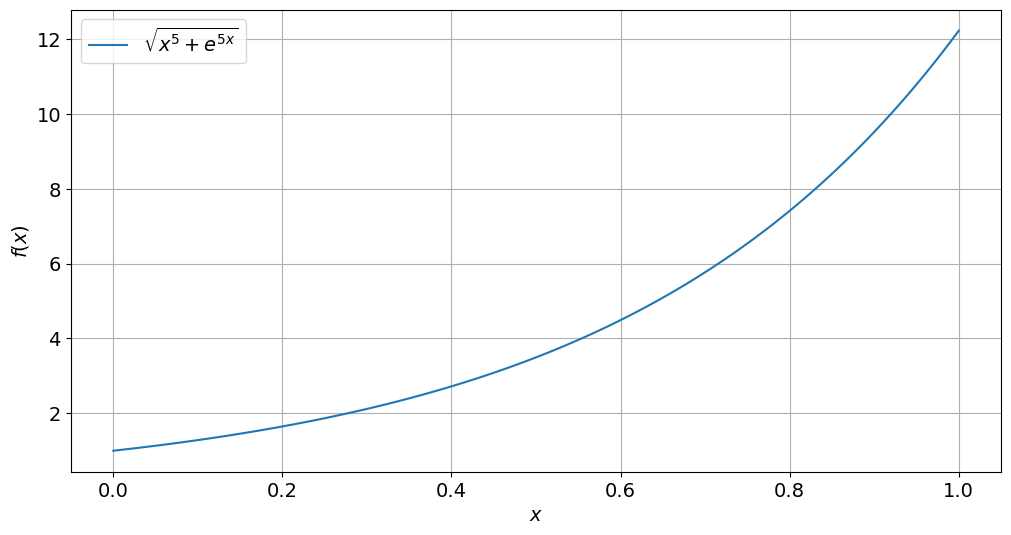

In [2]:
x = np.linspace(0,1,100)
def f(x): return np.sqrt(x**5+np.exp(5*x))

plt.plot(x, f(x), label=r"$\sqrt{x^5+e^{5x}}$")
plt.legend()
plt.ylabel(r'$f(x)$')
plt.xlabel(r'$x$');

We know that the integral represents, in this case, the area under the graph. The area is well defined and finite.

We could approximate it by a Riemann sum. For this purpose, we divide the interval $[0, 1]$ into $N − 1$ intervals of the same length $h$ with 

$$h = \frac{1}{N-1}.$$

The endpoints of these intervals are located at

$$x_n = (n-1)h,\qquad \mathrm{with}\quad n=1,2,3,...,N.$$

This leads naturally to the definition of a rectangle for each interval $[x_n, x_{n+1}]$ whose height is determined by the value of the function at $x_n$, i.e. $f(x_n)$.

For N = 6, we can sketch this in our previous plot. But first we need to define a function for drawing trapezoids:

In [3]:
from matplotlib.path import Path
import matplotlib.patches as patches

def draw_trapezoid(xpoints, ypoints):
    """ Function for drawing trapezoids. Takes arrays of x- and y-values as input,
    moving clockwise from bottom left corner. """
    verts = [
        (xpoints[0], ypoints[0]), # left, bottom
        (xpoints[1], ypoints[1]), # left, top
        (xpoints[2], ypoints[2]), # right, top
        (xpoints[3], ypoints[3]), # right, bottom
        (0., 0.), # ignored
        ]

    codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.CLOSEPOLY,
             ]

    path = Path(verts, codes)
    ax = plt.gca()
    patch = patches.PathPatch(path, facecolor='#d3d3d3', lw=1)
    ax.add_patch(patch)

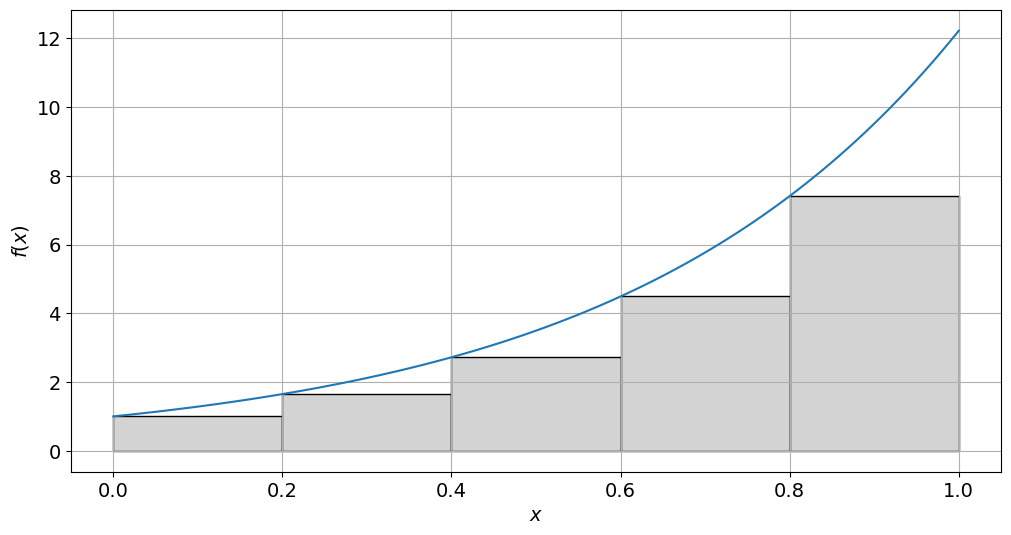

In [4]:
plt.plot(x, f(x))
plt.ylabel(r'$f(x)$')
plt.xlabel(r'$x$')

# Plot rectangles:
N = 6
h = 1/(N-1)
for n in range(1,N):
    draw_trapezoid([(n-1)*h,(n-1)*h,n*h,n*h], [0,f((n-1)*h),f((n-1)*h),0])

We can see that we make a fairly large error in our estimate of the integral when we use these rectangles. How can we do better?

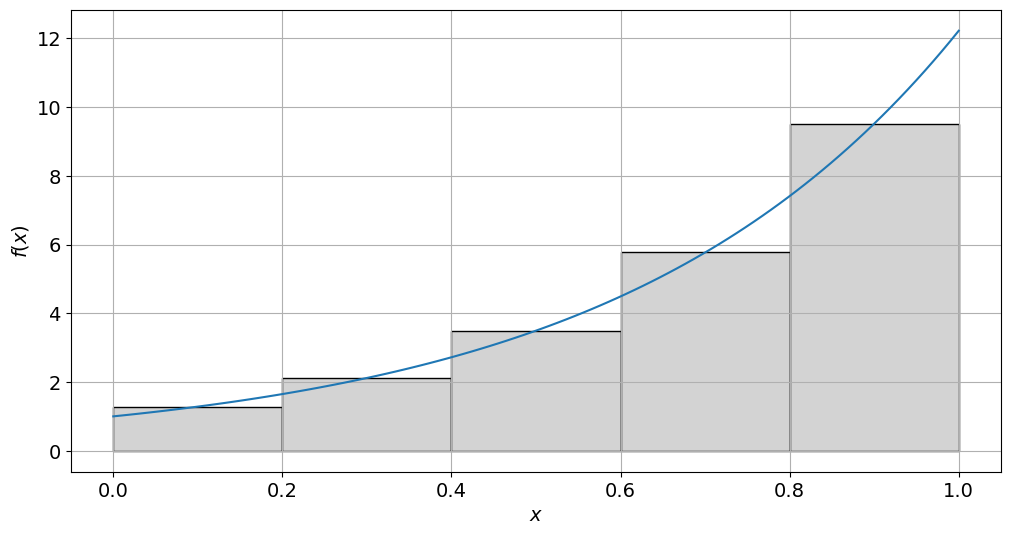

In [5]:
# Well we could evaluate the function not at the end but at the midpoint of the interval. 
plt.plot(x, f(x))
plt.ylabel(r'$f(x)$')
plt.xlabel(r'$x$')

# Plot rectangles:
N = 6
h = 1/(N-1)
for n in range(1,N):
    height = f((n-1+0.5)*h)
    draw_trapezoid([(n-1)*h,(n-1)*h,n*h,n*h], [0,height,height,0])

### Trapezoidal Rule

One way to go forward is to make the intervals smaller. In the limit when their length goes to zero, we should find the exact value of the integral.

However, this is impractical on the computer since it involves infinitely many calculations. What else can we do?

Well, a better approximation can already be obtained with our last set of intervals if we use trapezoids instead. Two sides (top and bottom) of each trapezoid are determined by the interval along the x-axis, while the other two sides (left and right) are determined by the values of the function $f(x)$ at each end of the interval.
Let’s see what this looks like in the plot.

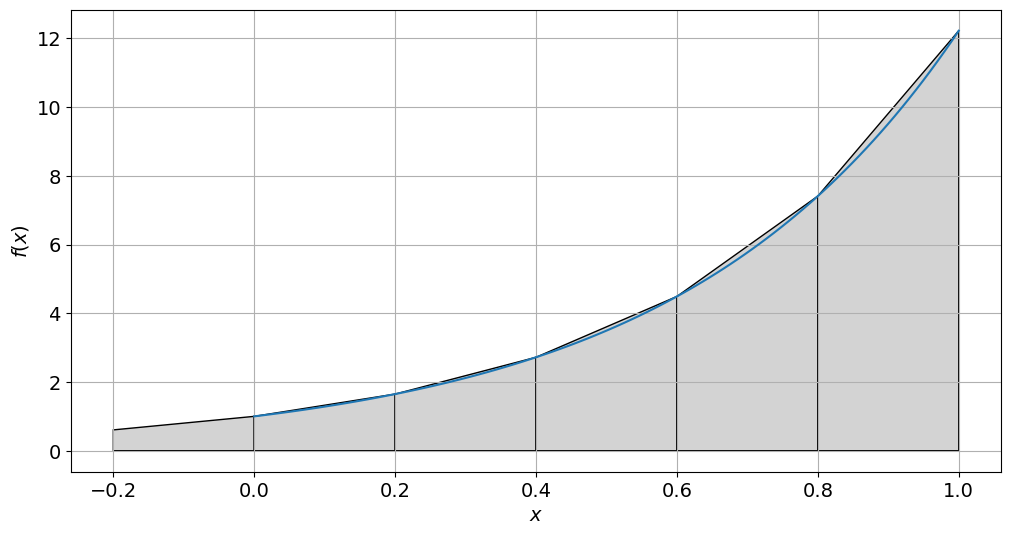

In [6]:
plt.plot(x, f(x))
plt.ylabel(r'$f(x)$')
plt.xlabel(r'$x$')

# Plot trapezoids:
N = 6
h = 1/(N-1)
for n in range(N):
    draw_trapezoid([(n-1)*h,(n-1)*h,n*h,n*h], [0,f((n-1)*h),f((n)*h),0])

It seems that we are making a much smaller error than before, given the same set of intervals. The error seems to increase when the curvature of the graph increases (towards the right in this plot).

Let us derive a formula for the area that the trapezoids cover. Using our notation above, the area of a trapezoid is given by

$$A_n=h\frac{f_n+f_{n+1}}{2} $$

with $f_n=f(x_n)$.
Here, $h$ is the length of each interval, and hence the length of the base of each trapezoid, and the expression

￼$$\frac{f_n + f_{n+1}}{2}$$

represents the "average height" of the corresponding trapezoid.

Adding up all the trapezoids, we obtain the total area

$$A=A_1 +A_2 +A_3 +...+A_{N−1}$$

and so

$$A=h\frac{f_1 +f_2}{2} +h\frac{f_2 +f_3}{2} +h\frac{f_3 +f_4}{2} +...h\frac{f_{N−1} +f_N}{2}.$$

Factoring out h and rearranging terms gives

$$A=h\left(\frac{1}{2}f_1+f_2+f_3+...+f_{N−1}+\frac{1}{2}f_N\right).$$

This formula describes the __trapezoidal rule__ and approximates the original integral.

The factors inside the bracket are 0.5, 1, 1, ..., 1, 0.5. This stems from the fact that we only use the endpoints 0 and 1 once in our calculation while all other points are involved twice in the determination of trapezoidal areas.

Note that we do not need to assume an interval $[0, 1]$. Instead, we can use this method for any interval $[a, b]$. The definitions then change to 

$$h= \frac{b−a}{N-1}\qquad \mathrm{and} \qquad x_n =a+(n−1)h.$$

￼This way, we can approximate the integral by

$$\boxed{\int_a^b f(x) \mathrm{d}x \approx h\left(\frac{1}{2}f_1+f_2+f_3+...+f_{N−1}+\frac{1}{2}f_N\right).}$$

It can be shown that this method contains an error (i.e. actual value of the definite integral vs. numerical value) that is proportional to

1. $(b−a)^3$,
2. $\frac{1}{N^2}$, and
3. the (maximum) magnitude of the second derivative of $f(x)$
over the respective interval.

Hence, doubling the amount of intervals reduces the error by a factor of four! However, choosing very large $N$ is not a good idea for two reasons:
- It increases the computational time.
- The computer has finite precision; rounding errors become important!

The second derivative is linked to the curvature of the graph and we saw above that the error indeed increased where the curvature was larger. This makes sense since we are trying to approximate a curved graph with a straight line.

Let's approximate the integral

$$ \int_0^1 \sqrt{x^5+e^{5x}} \mathrm{d}x$$

for various $N$. As we increase N, the values for the trapezoidal rule converge. Try it yourself!

In [7]:
# Define the interval
a = 0.0
b = 1.0

N = 10                  # defining the amount of points making up the smaller intervals
n = np.linspace(1, N, N)
h = (b-a)/(N-1)         # defining the length of each small interval

area = 0                # setting the area to zero

for i in n:
    x = a + (i-1)*h
    func = np.sqrt(x**5+np.exp(5*x))
    if (i==1 or i==N):  # First and last point
        area += 0.5*func*h
    else:
        area += func*h
        
print(r'The value of the integral is %f.' % area)

The value of the integral is 4.512140.


## In class exercise
- Let's turn this into a function we call trapezoidal which takes, a, b, N and func as input and gives back the definite integral.  
- Double check it gives the correct result
- *Bonus*, implement a keyword argument midpoint, which uses the trick from above that uses the linear approximation i.e. same slope but around the midpoint of the interval

In [14]:
def trapezoidal(a, b, N, func):
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    area = h * func(x).sum() - 0.5 * h * (func(a) + func(b)) # vectorized implementation is much faster than for loop
    # print(r'The value of the integral is %f.' % area)
    return area
trapezoidal(0, 1, 10, f)

4.512140046465683

### Simpson's Rule

__Question:__
Is there a better, i.e. more precise, method to approximate an integral? Can we do just as well with fewer intervals?

__Answer:__
Yes, there are several methods.
One method is called __Simpson’s rule__. The idea behind this method is that we do not approximate the graph locally by a straight line, as is the case for the trapezoidal method, but rather by a polynomial of order 2. This means that we approximate the function $f(x)$ in each subinterval by

$$f(x) \approx c_n x^2 + d_n x + e_n =: g_n(x).$$

The parameters $c_n$, $d_n$, $e_n$ are chosen so that $f(x)$ and $g_n(x)$ coincide at the endpoints of the interval and at its midpoint.

#### Example:

Let us plot our original function and approximate it by a second-order polynomial with the above characteristics. We get the equations
\begin{align*}
e_n &= f(0), \\
\frac{1}{4}c_n+\frac{1}{2}d_n+e_n &= f(0.5), \\
c_n+d_n+e_n &= f(1),
\end{align*}
which yields
\begin{align*}
c_n &= 2f(1)-4f(0.5)+2f(0),\\
d_n &= -f(1) + 4f(0.5) - 3f(0),\\
e_n &= f(0).
\end{align*}

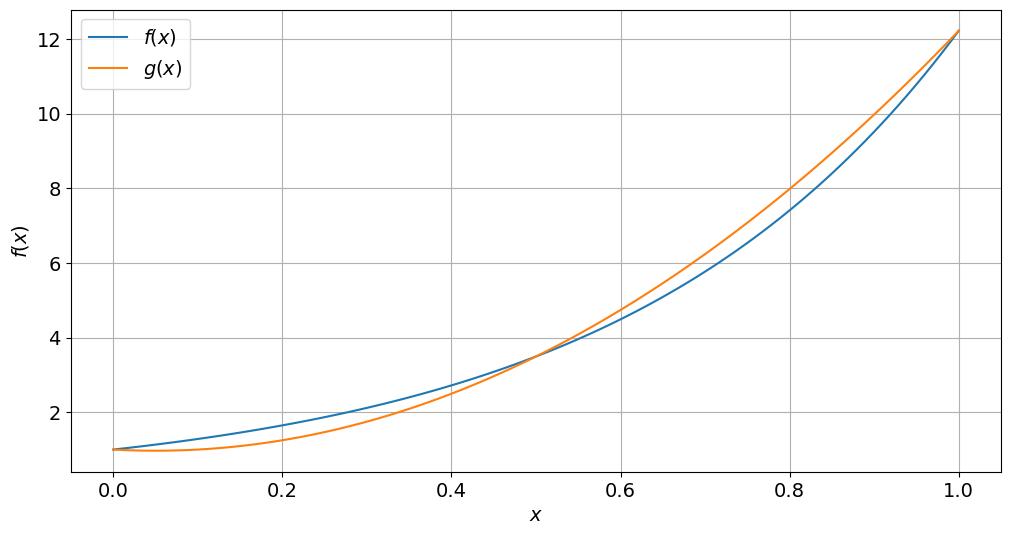

In [8]:
# Determine the parameter values:
c_n = 2*(f(1)-2*f(0.5)+f(0))
d_n = -f(1)+4*f(0.5)-3*f(0)
e_n = f(0)

x = np.linspace(0,1,100)
def g(x): return c_n*x**2 + d_n*x + e_n

plt.plot(x, f(x), x, g(x))
plt.ylabel(r'$f(x)$')
plt.xlabel(r'$x$')
plt.legend([r'$f(x)$', r'$g(x)$'], loc=2);

We see that the polynomial describes the original function already quite well. And we have not even started to divide the interval $[0, 1]$ into subintervals...

It is important to note that Simpson’s rule requires and odd number of points ($N$ = 3, 5, 7, ...) along the $x$-axis since we need to use three points for each interval, i.e. left endpoint, right endpoint and midpoint.

At the same time, two adjacent intervals share one endpoint, i.e. the right endpoint of one interval coincides with the left endpoint of another interval (except at $x = b$).

All along, we still maintain a uniform division of the original interval $[a, b]$ into smaller subintervals.

The simplest case is using three points for the original interval, representing one interval with one midpoint:

$$x_1 =a,\, x_2 =\frac{b-a}{2},\, x_3 =b.$$

This case is exhibited in the previous plot. In this case, it can be shown that the integral approximation reduces to

$$\int_a^b f(x) \mathrm{d}x \approx \frac{b-a}{6}\left[f(x_1)+4f(x_2)+f(x_3)\right].$$

The next case uses five points: two intervals with one midpoint each. Now, we obtain

$$\int_a^b f(x) \mathrm{d}x \approx \frac{h}{3}\left[f(x_1)+4f(x_2)+2f(x_3)+4f(x_4)+f(x_5)\right],$$

where $h$ is the distance between two successive points along the $x$-axis. This scenario is plotted below.

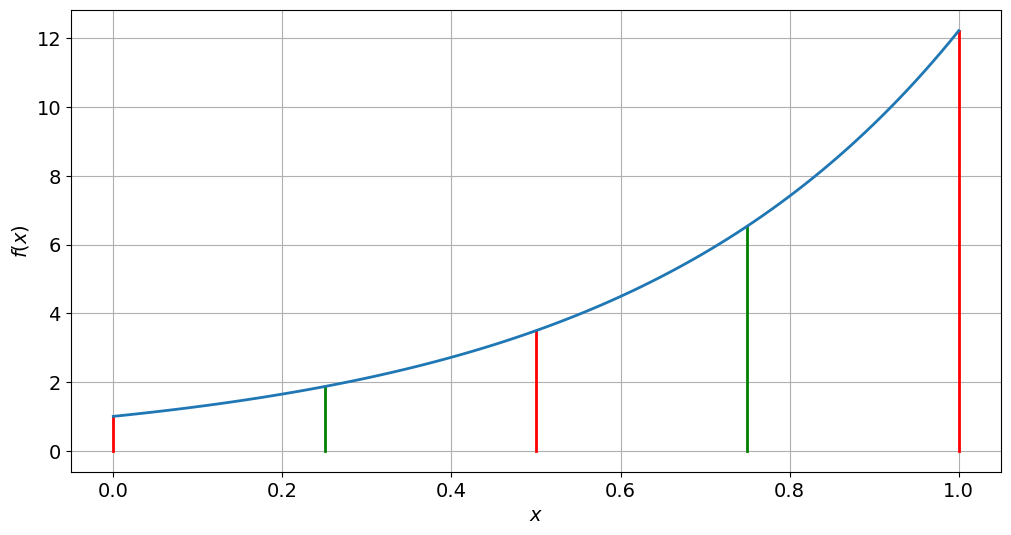

In [9]:
N = 5
h = (b-a)/(N-1)
# Plot lines
color = ['r', 'g', 'r', 'g', 'r']
for i in range(N):
    plt.plot([i*h, i*h],[0, f(i*h)], color[i], lw=2)

plt.plot(x, f(x),lw=2)
plt.ylabel(r'$f(x)$')
plt.xlabel(r'$x$');

The case of two intervals: $[0, 0.5]$ and $[0.5, 1]$. We have a total of 5 points along the $x$-axis, namely 3 interval endpoints $(x_1 = 0,\, x_3 = 0.5,\, x_5 = 1)$ and 2 midpoints
$(x_2 = 0.25,\, x_4 = 0.75)$. Simpson’s rule employs second-order polynomials in each interval.

The general expression for an arbitrary number of intervals is

$$\int_a^b f(x) \mathrm{d}x \approx \frac{h}{3}\left[f(x_1)+4f(x_2)+2f(x_3)+4f(x_4)+...2f(x_{N-2})+4f(x_{N-1})+f(x_N)\right],$$

or using our previous notation above

$$\boxed{\int_a^b f(x) \mathrm{d}x \approx \frac{h}{3}\left[f_1+4f_2+2f_3+4f_4+...+2f_{N-2}+4f_{N-1}+f_N\right].}$$

Let us compute the same integral as for the trapezoidal rule, only this time using Simpson’s rule.

In [10]:
a = 0.0           # defining the interval
b = 1.0           # defining the interval
N = 3             # defining the amount of points making up the smaller intervals
n = np.linspace(1, N, N)
h = (b-a)/(N-1)   # defining the length of each small interval
area = 0          # setting the aera to zero
 
for i in n:
    x = a+(i-1)*h        
    func = np.sqrt(x**5+np.exp(5*x))
    if (i==1) | (i==N):    # if we are at the left or right end of the main
        area += func         # interval 
    else:
        if i%2==0:         # if we are at an "even" point
            area += 4*func     
        else:              # if we are at an "odd" point
            area += 2*func
 
area = (h/3)*area    # multiplying everything by h/3

print(r'The value of the integral is %f.' % area)

The value of the integral is 4.533789.


Try for different $N$. Does it converge faster than before?

In contrast to the trapezoidal rule, Simpson’s rule contains an error that is proportional to
1. $(b−a)^5$,
2. $\frac{1}{N^4},$ and
3. the (maximum) magnitude of the fourth derivative of $f(x)$ over the respective interval.

In other words, it is superior in accuracy to the trapezoidal rule with respect to the amount of intervals $N$.

## In class exercise
- Again turn the Simpson rule into a function analogous to the trapezoidal one you made above. 
- $\int 4x^3 dx = x^4$ and also $\int 5x^4 dx = x^5$  Let's check the answer of our functions trapezoidal and Simpson for the interval $[0..2]$ against this analytic expectation. 
- Now let us make a plot of the absolute of the relative error of the results of each of our integration functions as compared to the analytic expectations as a function of N (the number of intervals used in the approximation). Should be a log log plot as seen below. 

In [17]:
def simpson(a, b, N, func):
    assert N % 2 == 1, 'N must be odd'
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    area = h / 3 * (func(a) + func(b) + 2 * func(x[1:-1:2]).sum() + 2 * func(x[1:-1]).sum()) # vectorized implementation is much faster than for loop
    # print(r'The value of the integral is %f.' % area)
    return area

In [18]:
simpson(0, 1, 3, f)

4.533789077915022

In [19]:
# Expect 16
print(trapezoidal(0, 2, 10, lambda x: 4 * x**3))
print(simpson(0, 2, 3, lambda x: 4 * x**3))

16.19753086419753
16.0


In [20]:
# Expect 32
print(trapezoidal(0, 2, 10, lambda x: 5 * x**4))
print(simpson(0, 2, 3, lambda x: 5 * x**4))

32.65762332977695
33.33333333333333


C:\Users\danie\AppData\Local\Temp\ipykernel_2244\1960095738.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  h = (b - a) / (N - 1)
C:\Users\danie\AppData\Local\Temp\ipykernel_2244\1960095738.py:4: RuntimeWarning: invalid value encountered in double_scalars
  area = h * func(x).sum() - 0.5 * h * (func(a) + func(b)) # vectorized implementation is much faster than for loop
C:\Users\danie\AppData\Local\Temp\ipykernel_2244\971351082.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  h = (b - a) / (N - 1)


Text(0.5, 0, '$N$')

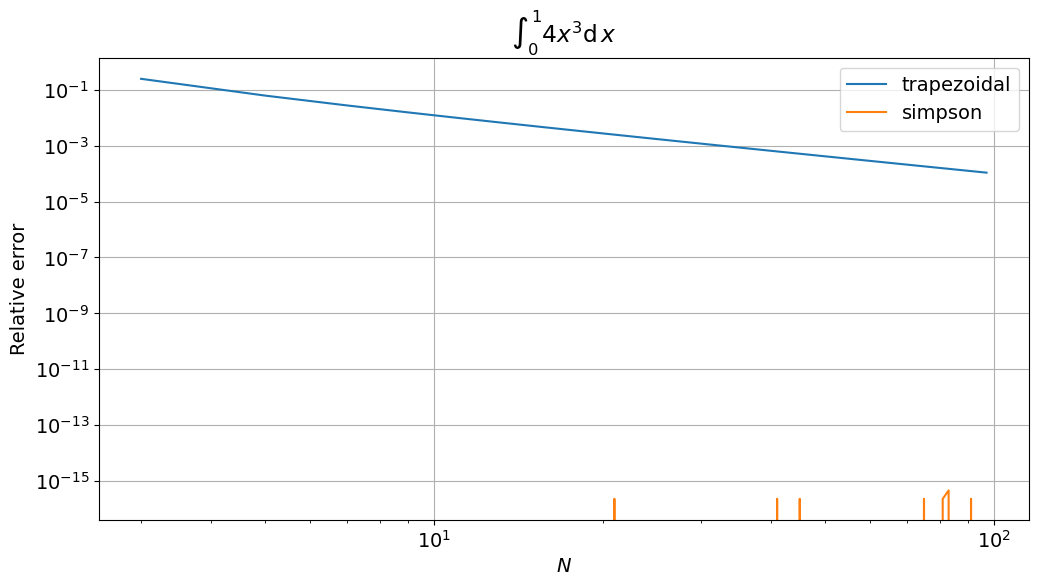

In [25]:
N = np.arange(1, 99, 2)
trapezoidal_error = [(trapezoidal(0, 2, n, lambda x: 4 * x**3) - 16) / 16 for n in N]
simpson_error = [(simpson(0, 2, n, lambda x: 4 * x**3) - 16) / 16 for n in N]
plt.loglog(N, trapezoidal_error, label = "trapezoidal")
plt.loglog(N, simpson_error, label = "simpson")
plt.title(r"$\int_0^14x^3\mathrm{d}\,x$")
plt.legend()
plt.ylabel("Relative error")
plt.xlabel(r"$N$")

C:\Users\danie\AppData\Local\Temp\ipykernel_2244\1960095738.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  h = (b - a) / (N - 1)
C:\Users\danie\AppData\Local\Temp\ipykernel_2244\1960095738.py:4: RuntimeWarning: invalid value encountered in double_scalars
  area = h * func(x).sum() - 0.5 * h * (func(a) + func(b)) # vectorized implementation is much faster than for loop
C:\Users\danie\AppData\Local\Temp\ipykernel_2244\971351082.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  h = (b - a) / (N - 1)


Text(0.5, 0, '$N$')

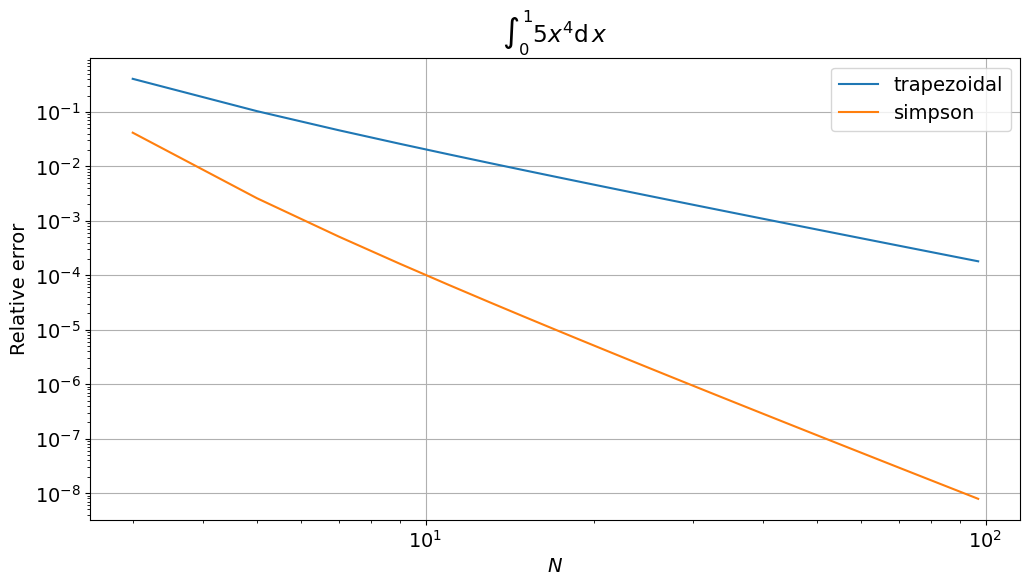

In [26]:
N = np.arange(1, 99, 2)
trapezoidal_error = [(trapezoidal(0, 2, n, lambda x: 5 * x**4) - 32) / 32 for n in N]
simpson_error = [(simpson(0, 2, n, lambda x: 5 * x**4) - 32) / 32 for n in N]
plt.loglog(N, trapezoidal_error, label = "trapezoidal")
plt.loglog(N, simpson_error, label = "simpson")
plt.title(r"$\int_0^15x^4\mathrm{d}\,x$")
plt.legend()
plt.ylabel("Relative error")
plt.xlabel(r"$N$")

![Convergence of methods](Convergence.png)

## Further exploration

In [11]:
from scipy.integrate import trapz 
from scipy.integrate import simps
from scipy.integrate import quad

In [27]:
quad(f, 0, 1)

(4.48330992361351, 4.977473903726171e-14)

Explore the use of trapz, simps and quad we imported from scipy. You can compare these with our own functions and familiarize yourself with when one would use which. 


Another approach we can recommend learning more about is implemented in [scipy.UnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html). 